<center><h2> Walmart Sales Forecasting </h2></center>

### Business Problem

In this project, students are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.

You may only use the provided data to make your predictions.

### Data

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

The basic idea of analyzing the Walmart Forecasting dataset is to get a fair idea about the factors affecting the Sales of the Walmart Store.

### Problem Statemtent

<b> By using these data we have to Predict the walmart sales forecasting based on different parameters</b>

### Data Description

stores.csv

    This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv

    This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

    Store - the store number
    Dept - the department number
    Date - the week
    Weekly_Sales -  sales for the given department in the given store
    IsHoliday - whether the week is a special holiday week
    test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

features.csv

    This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

    Store - the store number
    Date - the week
    Temperature - average temperature in the region
    Fuel_Price - cost of fuel in the region
    MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
    CPI - the consumer price index
    Unemployment - the unemployment rate
    IsHoliday - whether the week is a special holiday week

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Business objectives and constraints

1. The cost of a mis-classification can be very high.
2. There is some latency concerns.



```
# This is formatted as code
```

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

### Mounting with GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the Data From the CSV file

In [ ]:
train_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Walmart sales forecasting/train.csv')
features_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Walmart sales forecasting/features.csv')
stores_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Walmart sales forecasting/stores.csv')
test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Walmart sales forecasting/test.csv')

In [ ]:
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
# merging 3 different sets
df = train_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner')
df.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     2  2010-02-05      50605.27        False        42.31   
2      1     3  2010-02-05      13740.12        False        42.31   
3      1     4  2010-02-05      39954.04        False        42.31   
4      1     5  2010-02-05      32229.38        False        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.096358         8.106        False    A  151315  
2  211.096358         8.106        False    A  151315  
3  211.096358         8.106        False    A  151315  
4  211.096358         8.106        False    A  151315

In [ ]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [ ]:
df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size  
count  421570.000000  
mean   136727.915739  
std     60980.583328  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

I can see that We have a negative value for min Weekly_Sales. Let's expand on that information.

In [ ]:
df.loc[df['Weekly_Sales']<=0]

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
188         1    47  2010-02-19       -863.00      False        39.93   
406         1    47  2010-03-12       -698.00      False        57.79   
2549        1    47  2010-10-08        -58.00      False        63.93   
3632        1    54  2011-01-21        -50.00      False        44.04   
4132        1    47  2011-03-11          0.00      False        53.56   
...       ...   ...         ...           ...        ...          ...   
420066     45    49  2012-05-25         -4.97      False        67.21   
420403     45    49  2012-06-29        -34.00      False        75.22   
420736     45    49  2012-08-03         -1.91      False        76.58   
421007     45    54  2012-08-31          0.00      False        75.09   
421142     45    49  2012-09-14         -6.83      False        67.87   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
188          2.514        NaN        NaN        NaN        NaN        NaN   
406          2.667        NaN        NaN        NaN        NaN        NaN   
2549         2.633        NaN        NaN        NaN        NaN        NaN   
3632         3.016        NaN        NaN        NaN        NaN        NaN   
4132         3.459        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
420066       3.798    5370.39        NaN     361.22    1287.62    2461.81   
420403       3.506    3291.36     425.60        NaN     314.88    2255.34   
420736       3.654   24853.05      39.56      17.96   11142.69    2768.32   
421007       3.867   23641.30       6.00      92.93    6988.31    3992.13   
421142       3.948   11407.95        NaN       4.30    3421.72    5268.92   

               CPI  Unemployment Type    Size  
188     211.289143         8.106    A  151315  
406     211.380643         8.106    A  151315  
2549    211.746754         7.838    A  151315  
3632    211.827234         7.742    A  151315  
4132    214.111056         7.742    A  151315  
...            ...           ...  ...     ...  
420066  191.002810         8.567    B  118221  
420403  191.099246         8.567    B  118221  
420736  191.164090         8.684    B  118221  
421007  191.461281         8.684    B  118221  
421142  191.699850         8.684    B  118221  

[1358 rows x 16 columns]

1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 16)

Visualizing the Type of the Stores along with their percentage

In [ ]:
labels = df["Type"].value_counts()[:10].index
values = df["Type"].value_counts()[:10].values

colors=df["Type"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Visualizing the top 10 Department in the train dataset along with their percentage

In [ ]:
labels = df["Dept"].value_counts()[:10].index  # Taking the top 10 index
values = df["Dept"].value_counts()[:10].values  # Taking the top 10 values

colors=df["Dept"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Visualizing the top 10 store in the train dataset along with their percentage

Visualizing the Store Data

In [ ]:
labels = df["Store"].value_counts()[:10].index  # Taking the top 10 index
values = df["Store"].value_counts()[:10].values  # Taking the top 10 values

colors=df["Store"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Visualizing the IsHoliday Data

In [ ]:
labels = df['IsHoliday'].value_counts().index # Taking the all index
values = df['IsHoliday'].value_counts().values  # Taking the all values

colors=df['IsHoliday']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

As per the plot for the 93% of the time there is no Holiday

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

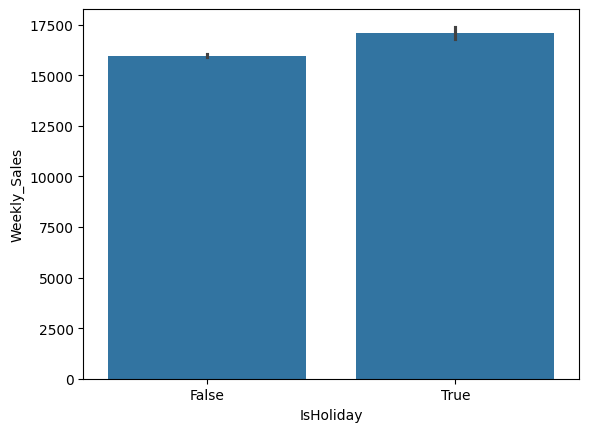

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [ ]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [ ]:
df['Week'] = df.Date.dt.isocalendar().week # for the week data
df['Year'] = df.Date.dt.year # for the year data
df['Month'] = df.Date.dt.to_period('M')

In [ ]:
holiday_df = df[df['IsHoliday'] == True]
holiday_df['Date'].unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

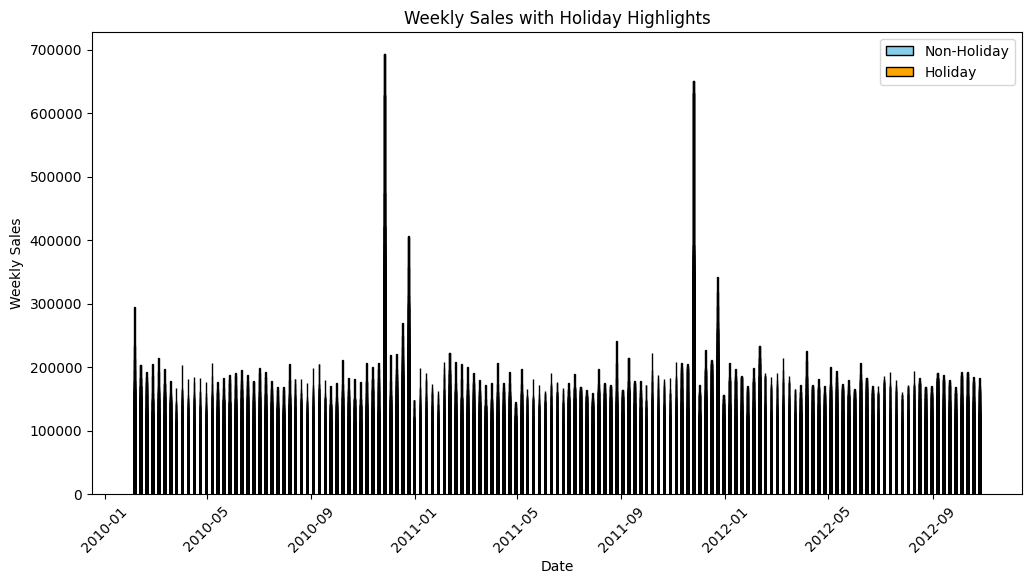

In [ ]:

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df['Date'], df['Weekly_Sales'], color='skyblue', edgecolor='black', label='Non-Holiday')

# Highlight the holidays
plt.bar(holiday_df['Date'], holiday_df['Weekly_Sales'], color='orange', edgecolor='black', label='Holiday')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales with Holiday Highlights')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

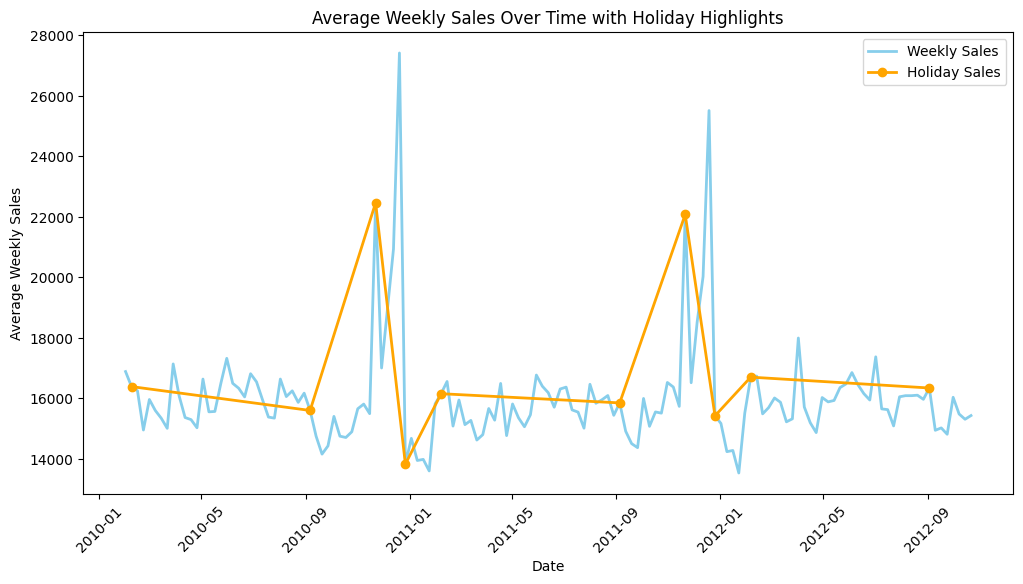

In [ ]:
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales = df.groupby('Week').agg({'Weekly_Sales': 'mean', 'IsHoliday': 'sum'}).reset_index()

# Plotting the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Weekly_Sales'], color='skyblue', label='Weekly Sales', linewidth=2)

# Highlight the holiday weeks
holiday_sales = weekly_sales[weekly_sales['IsHoliday'] > 0]
plt.plot(holiday_sales['Week'], holiday_sales['Weekly_Sales'], 'o-', color='orange', linewidth=2, label='Holiday Sales')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales Over Time with Holiday Highlights')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

There are only 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

So I'm gonna create 4 new columns for 4 types of holidays.

In [ ]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [ ]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

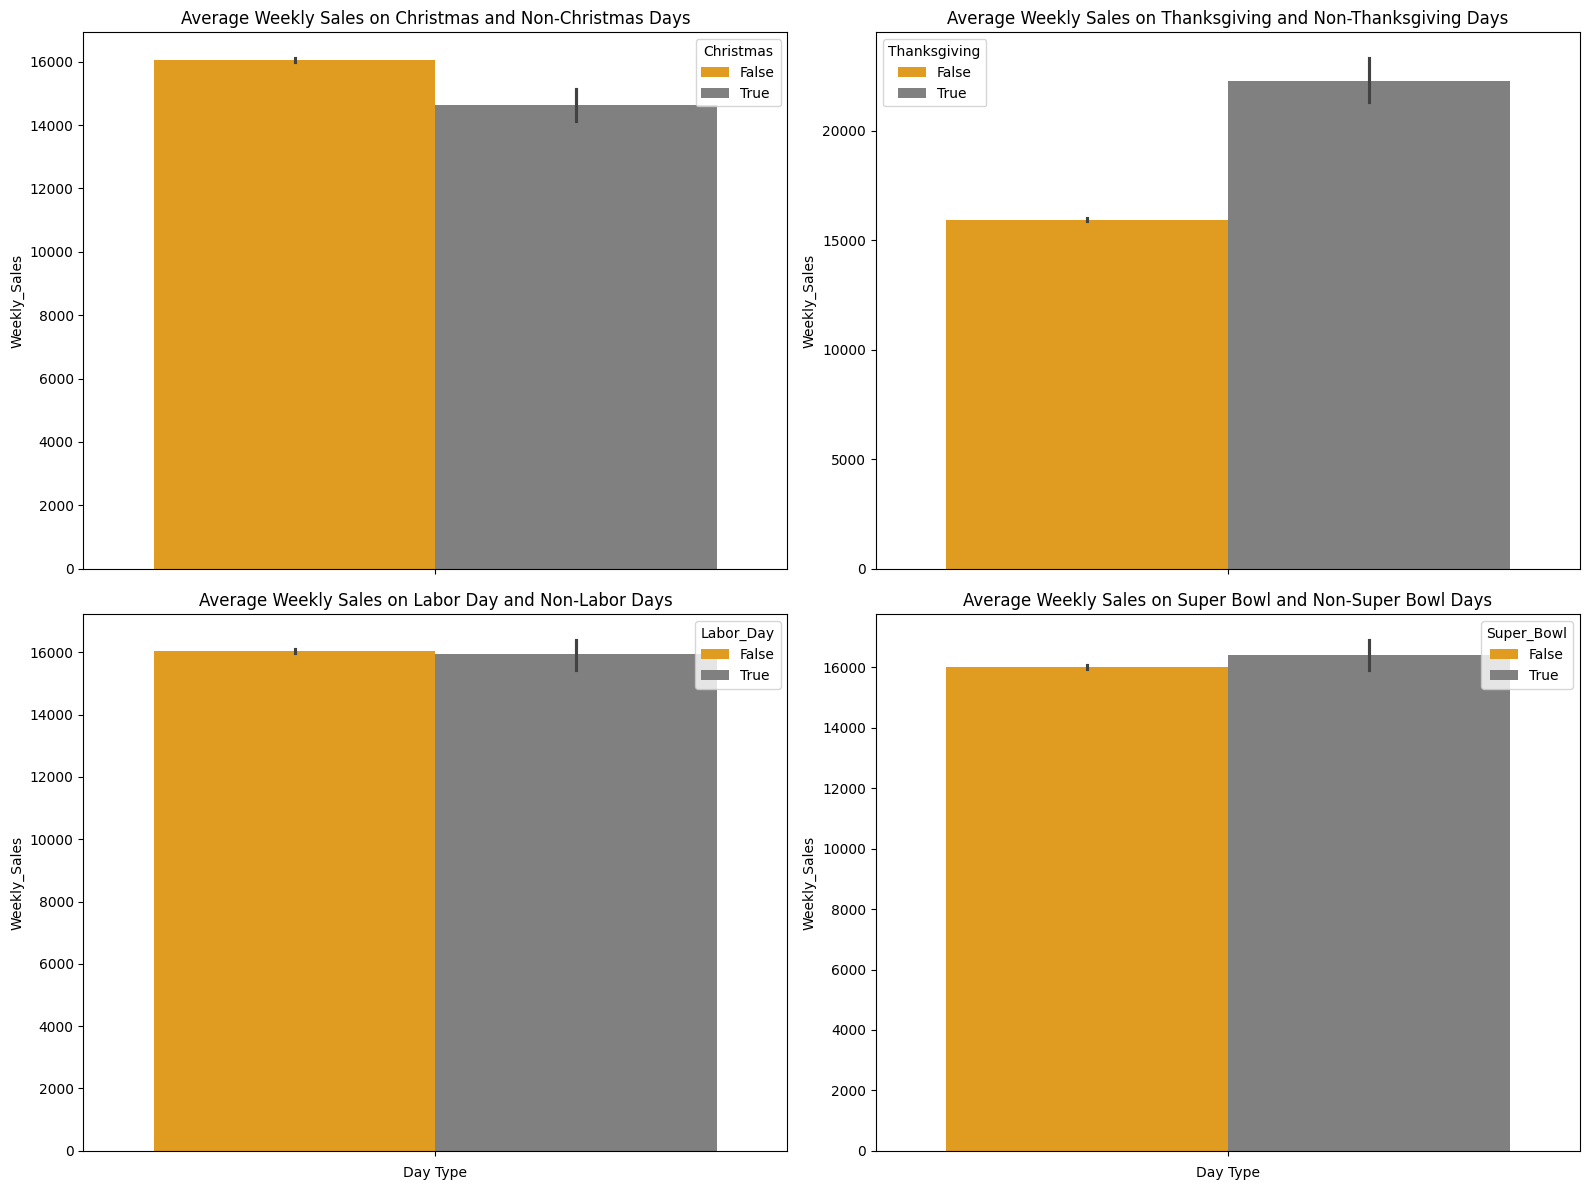

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plotting the bar plots with hue
sns.barplot(ax=axes[0, 0], y='Weekly_Sales', hue='Christmas', data=df, palette=['orange', 'grey'])
sns.barplot(ax=axes[0, 1], y='Weekly_Sales', hue='Thanksgiving', data=df, palette=['orange', 'grey'])
sns.barplot(ax=axes[1, 0], y='Weekly_Sales', hue='Labor_Day', data=df, palette=['orange', 'grey'])
sns.barplot(ax=axes[1, 1], y='Weekly_Sales', hue='Super_Bowl', data=df, palette=['orange', 'grey'])

# Adding labels and titles
axes[0, 0].set_title('Average Weekly Sales on Christmas and Non-Christmas Days')
axes[0, 1].set_title('Average Weekly Sales on Thanksgiving and Non-Thanksgiving Days')
axes[1, 0].set_title('Average Weekly Sales on Labor Day and Non-Labor Days')
axes[1, 1].set_title('Average Weekly Sales on Super Bowl and Non-Super Bowl Days')
axes[1, 0].set_xlabel('Day Type')
axes[1, 1].set_xlabel('Day Type')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Week                 0
Year                 0
Month                0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420212 n

In [ ]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df['Type'] = df['Type'].replace(type_group)

In [ ]:
df['IsHoliday'] = df['IsHoliday'].astype(bool).astype(int)

In [ ]:
df['Super_Bowl'] = df['Super_Bowl'].astype(bool).astype(int)

In [ ]:
df['Thanksgiving'] = df['Thanksgiving'].astype(bool).astype(int)

In [ ]:
df['Labor_Day'] = df['Labor_Day'].astype(bool).astype(int)

In [ ]:
df['Christmas'] = df['Christmas'].astype(bool).astype(int)

In [ ]:
train_merge = df.copy()

In [ ]:
# Total number of columns in the test_df
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [ ]:
features_df['Date'] = pd.to_datetime(features_df['Date'])

In [ ]:
# merging 3 different sets
test_merge = test_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner')
test_merge.head(5)

Store  Dept       Date  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
0      1     1 2012-11-02        False        55.32       3.386    6766.44   
1      1     2 2012-11-02        False        55.32       3.386    6766.44   
2      1     3 2012-11-02        False        55.32       3.386    6766.44   
3      1     4 2012-11-02        False        55.32       3.386    6766.44   
4      1     5 2012-11-02        False        55.32       3.386    6766.44   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0     5147.7      50.82     3639.9    2737.42  223.462779         6.573   
1     5147.7      50.82     3639.9    2737.42  223.462779         6.573   
2     5147.7      50.82     3639.9    2737.42  223.462779         6.573   
3     5147.7      50.82     3639.9    2737.42  223.462779         6.573   
4     5147.7      50.82     3639.9    2737.42  223.462779         6.573   

   IsHoliday_y Type    Size  
0        False    A  151315  
1        False    A  151315  
2        False    A  151315  
3        False    A  151315  
4        False    A  151315

In [ ]:
test_merge.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday_x         0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday_y         0
Type                0
Size                0
dtype: int64

In [ ]:
def scatter(train_merge, column):
    plt.figure()
    plt.scatter(train_merge[column] , train_merge['Weekly_Sales'], alpha=0.5)
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

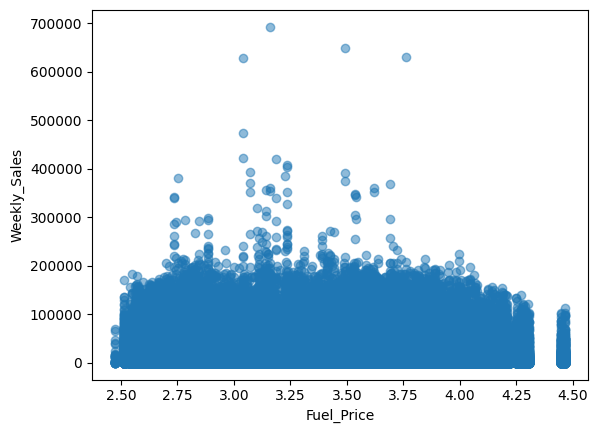

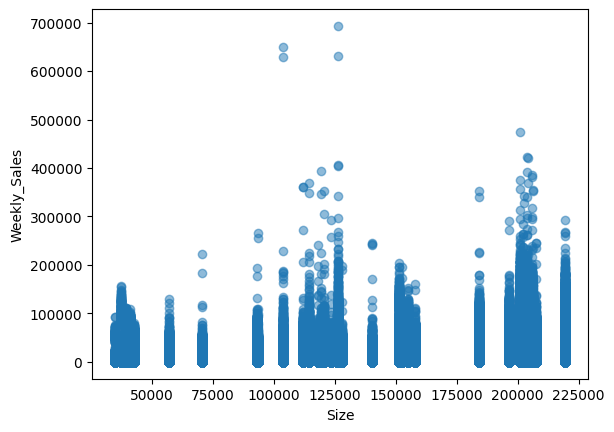

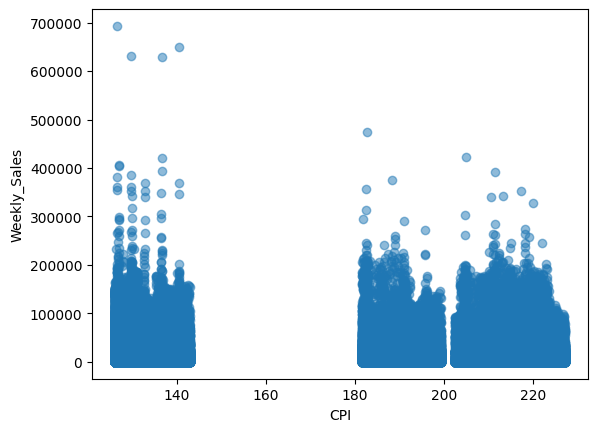

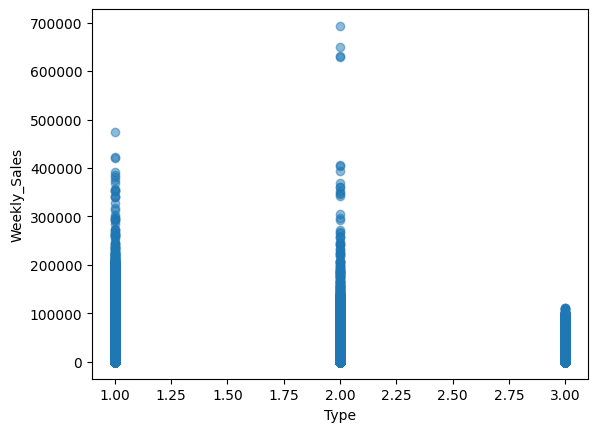

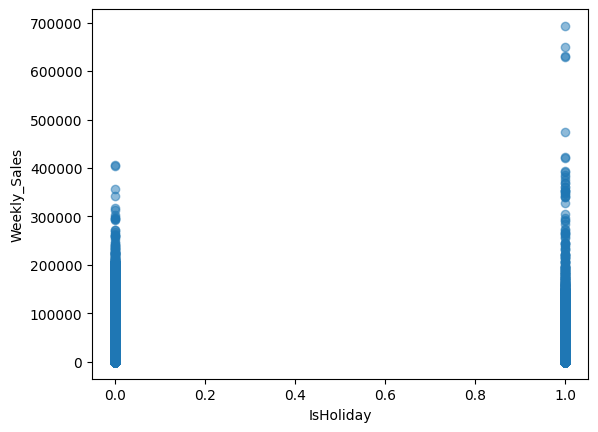

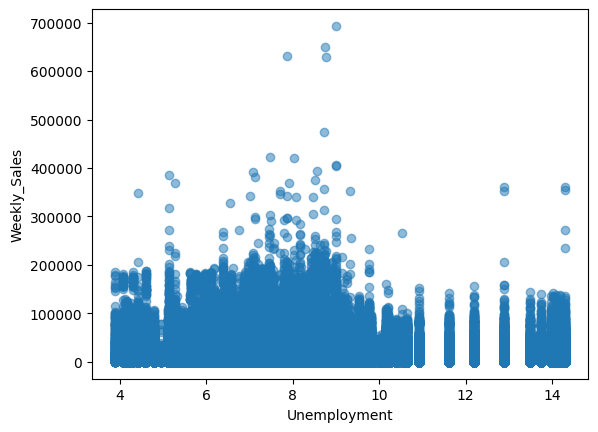

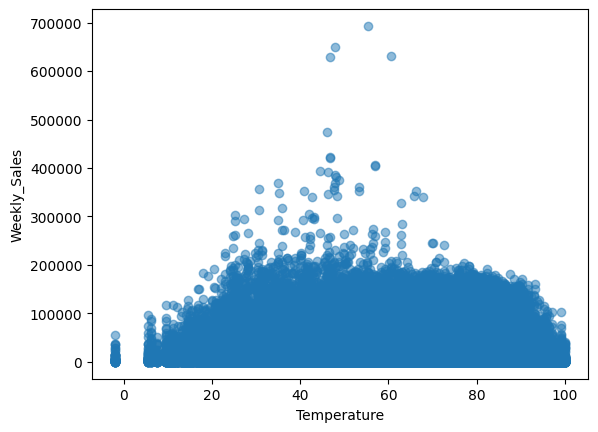

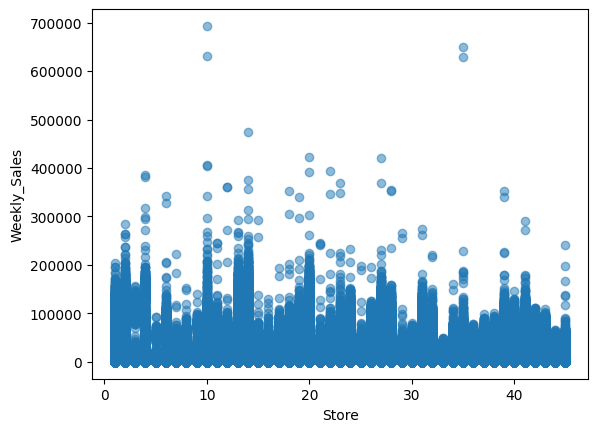

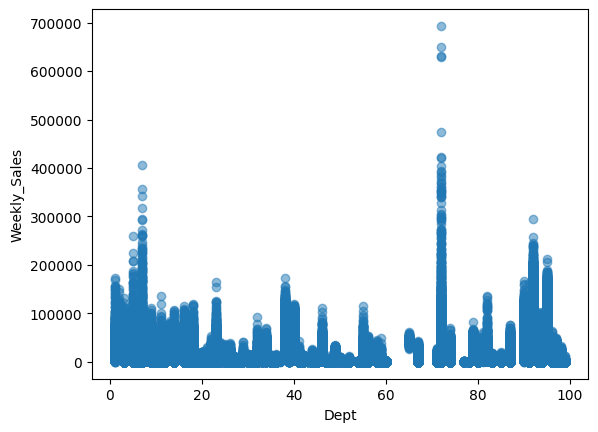

In [ ]:
scatter(train_merge, 'Fuel_Price')  # with respect to Fuel_Price
scatter(train_merge, 'Size')  # with respect to Size
scatter(train_merge, 'CPI')  # with respect to CPI
scatter(train_merge, 'Type')  # with respect to Type
scatter(train_merge, 'IsHoliday') # with respect to IsHoliday
scatter(train_merge, 'Unemployment')  # with respect to Unemployment
scatter(train_merge, 'Temperature') # with respect to Temperature
scatter(train_merge, 'Store') # with respect to Store
scatter(train_merge, 'Dept')  # with respect to Dept

### Correlation Matrix

Let's have a look at the Average Weekly Sales per Year and find out if there is any other holiday peak sales that were not considered by 'IsHoliday' filed

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

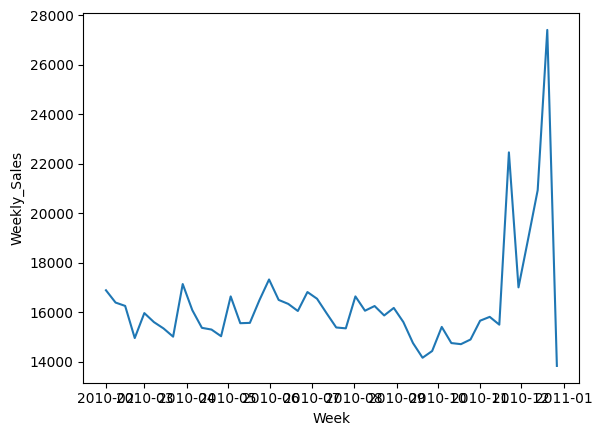

In [ ]:
# Average Weekly Sales for the year 2010
weekly_sales_2010 = train_merge[train_merge['Year']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(data = weekly_sales_2010) # for plotting then lineplot

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

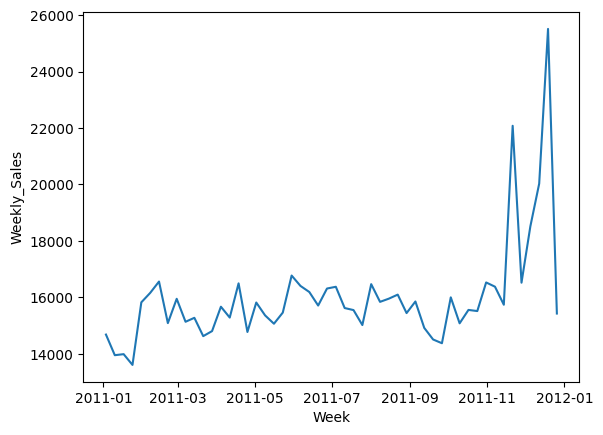

In [ ]:
# Average Weekly Sales for the year 2011
weekly_sales_2011 = train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(weekly_sales_2011) # for plotting then lineplot

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

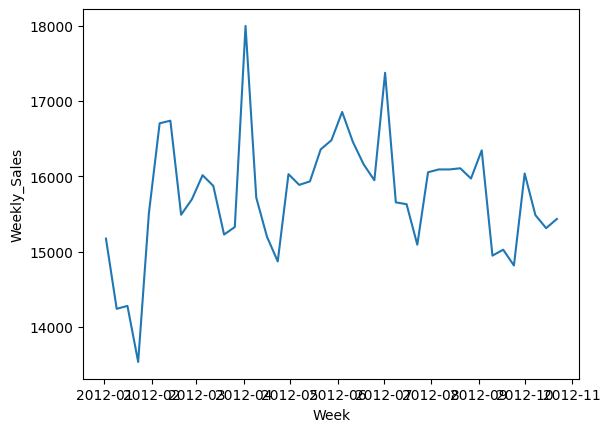

In [ ]:
# Average Weekly Sales for the year 2012
weekly_sales_2012 = train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(weekly_sales_2012) # for plotting then lineplot

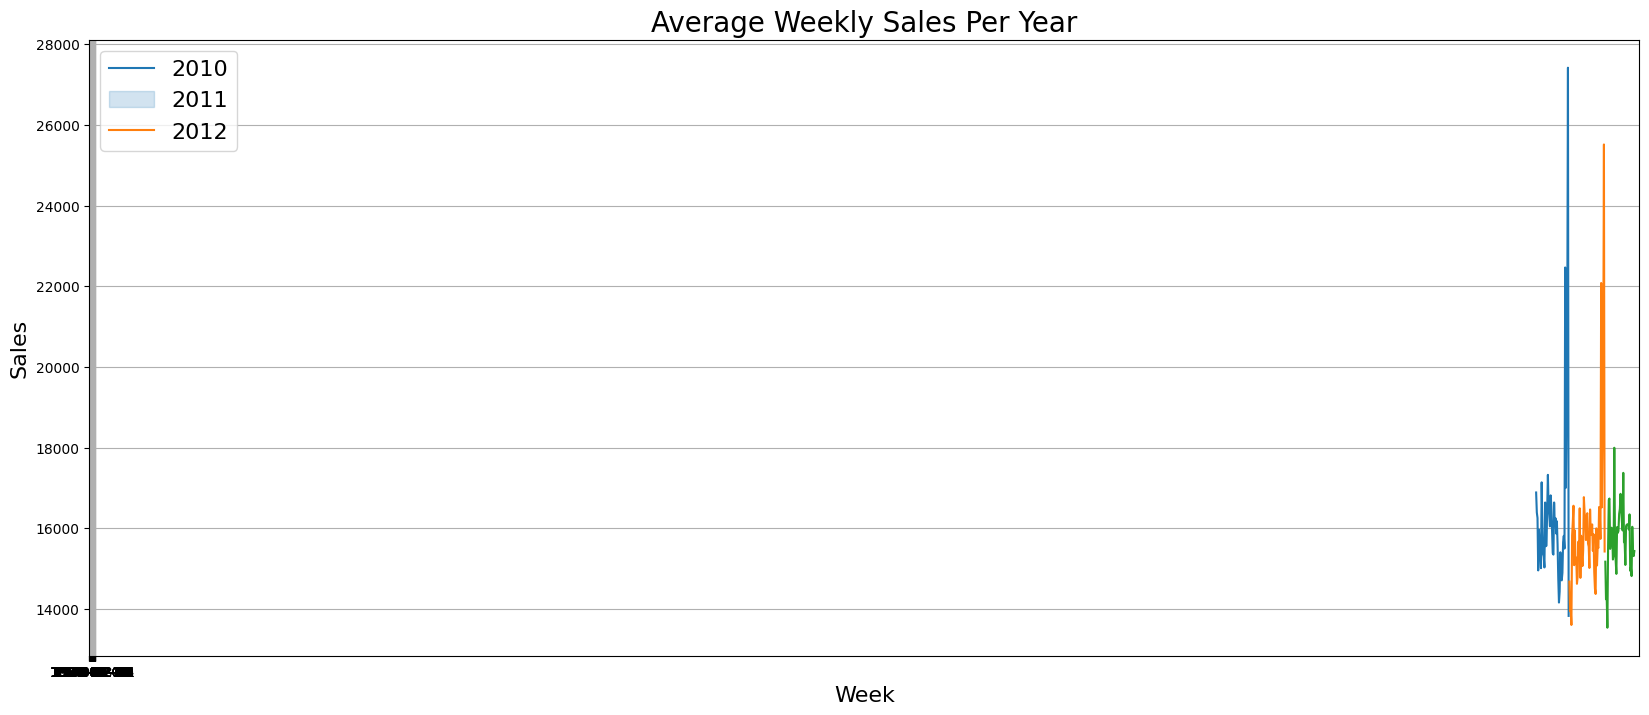

In [ ]:
# Plotting the above three plot together
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010)
sns.lineplot(weekly_sales_2011)
sns.lineplot(weekly_sales_2012)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

<ipython-input-51-bb382bf07d48>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




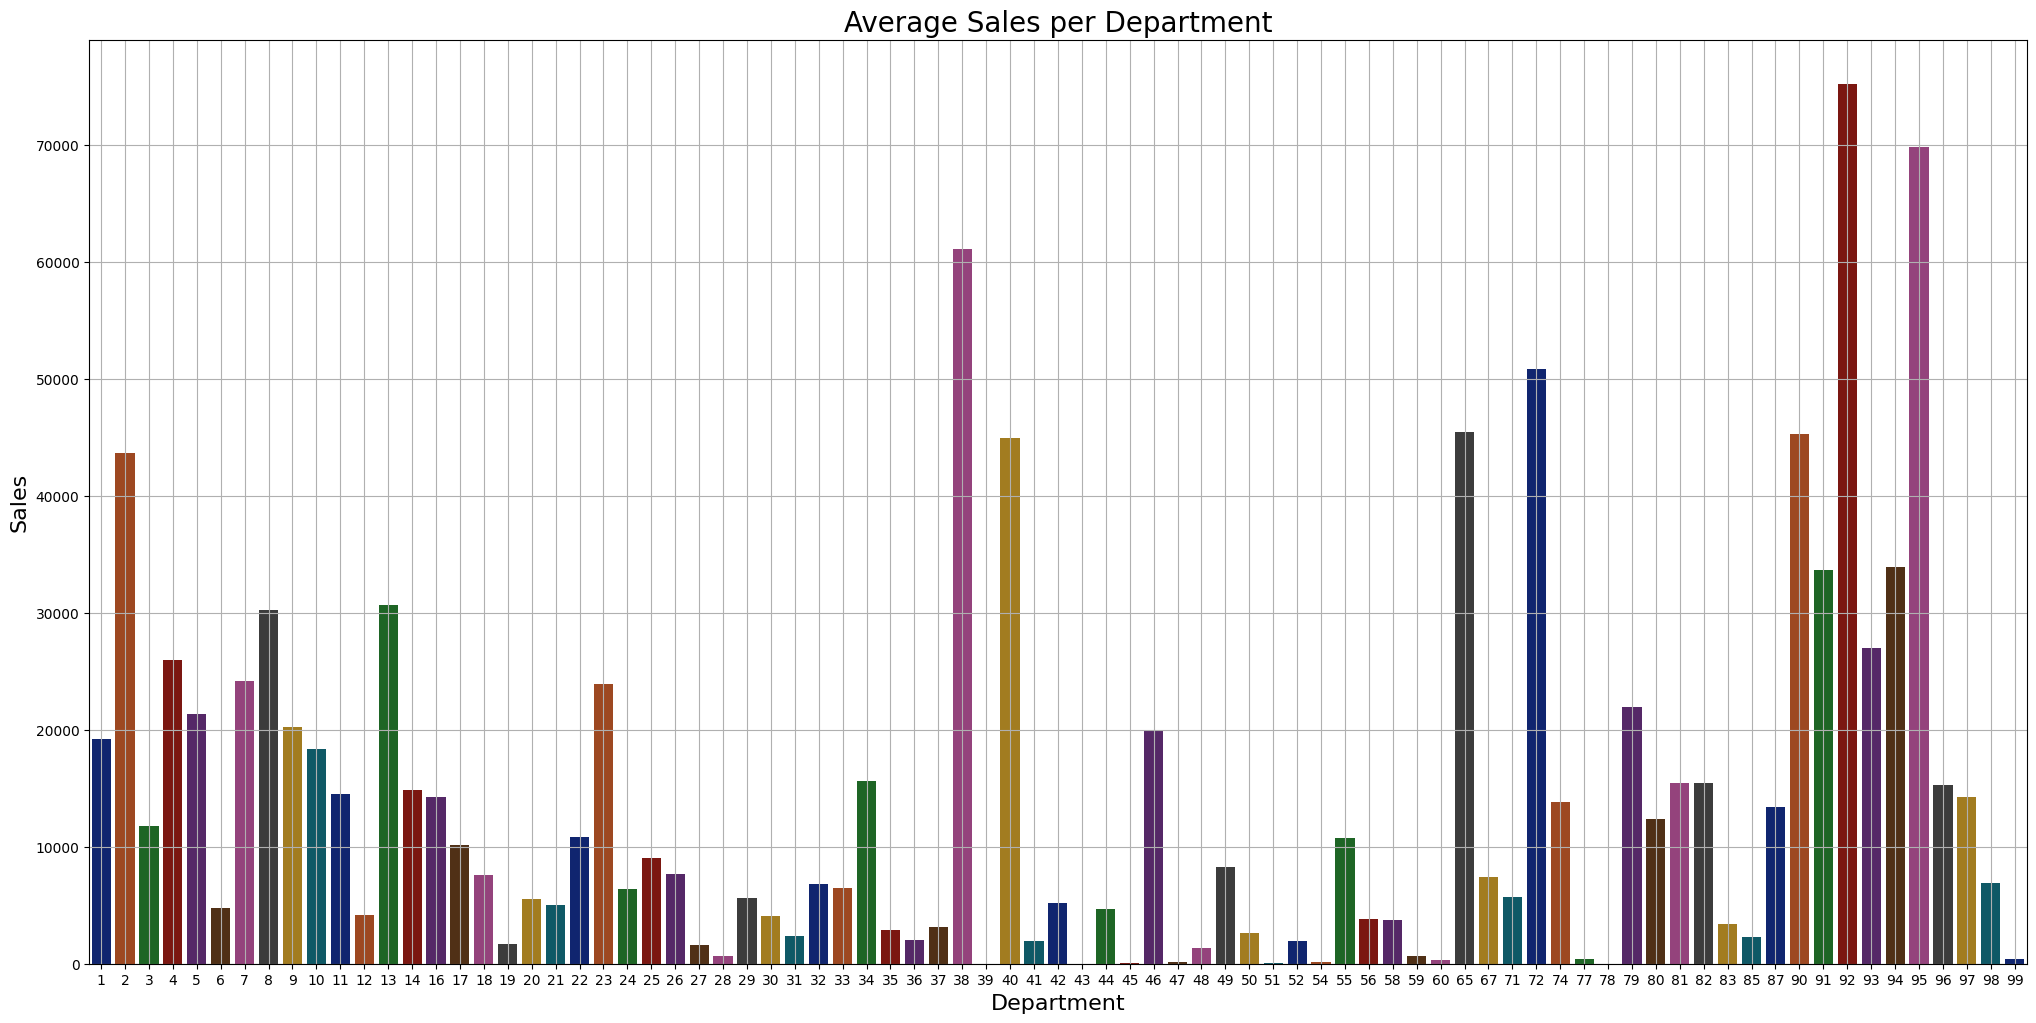

In [ ]:
# Average Sales per Department

weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(weekly_sales, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

<ipython-input-52-22d51b333d01>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




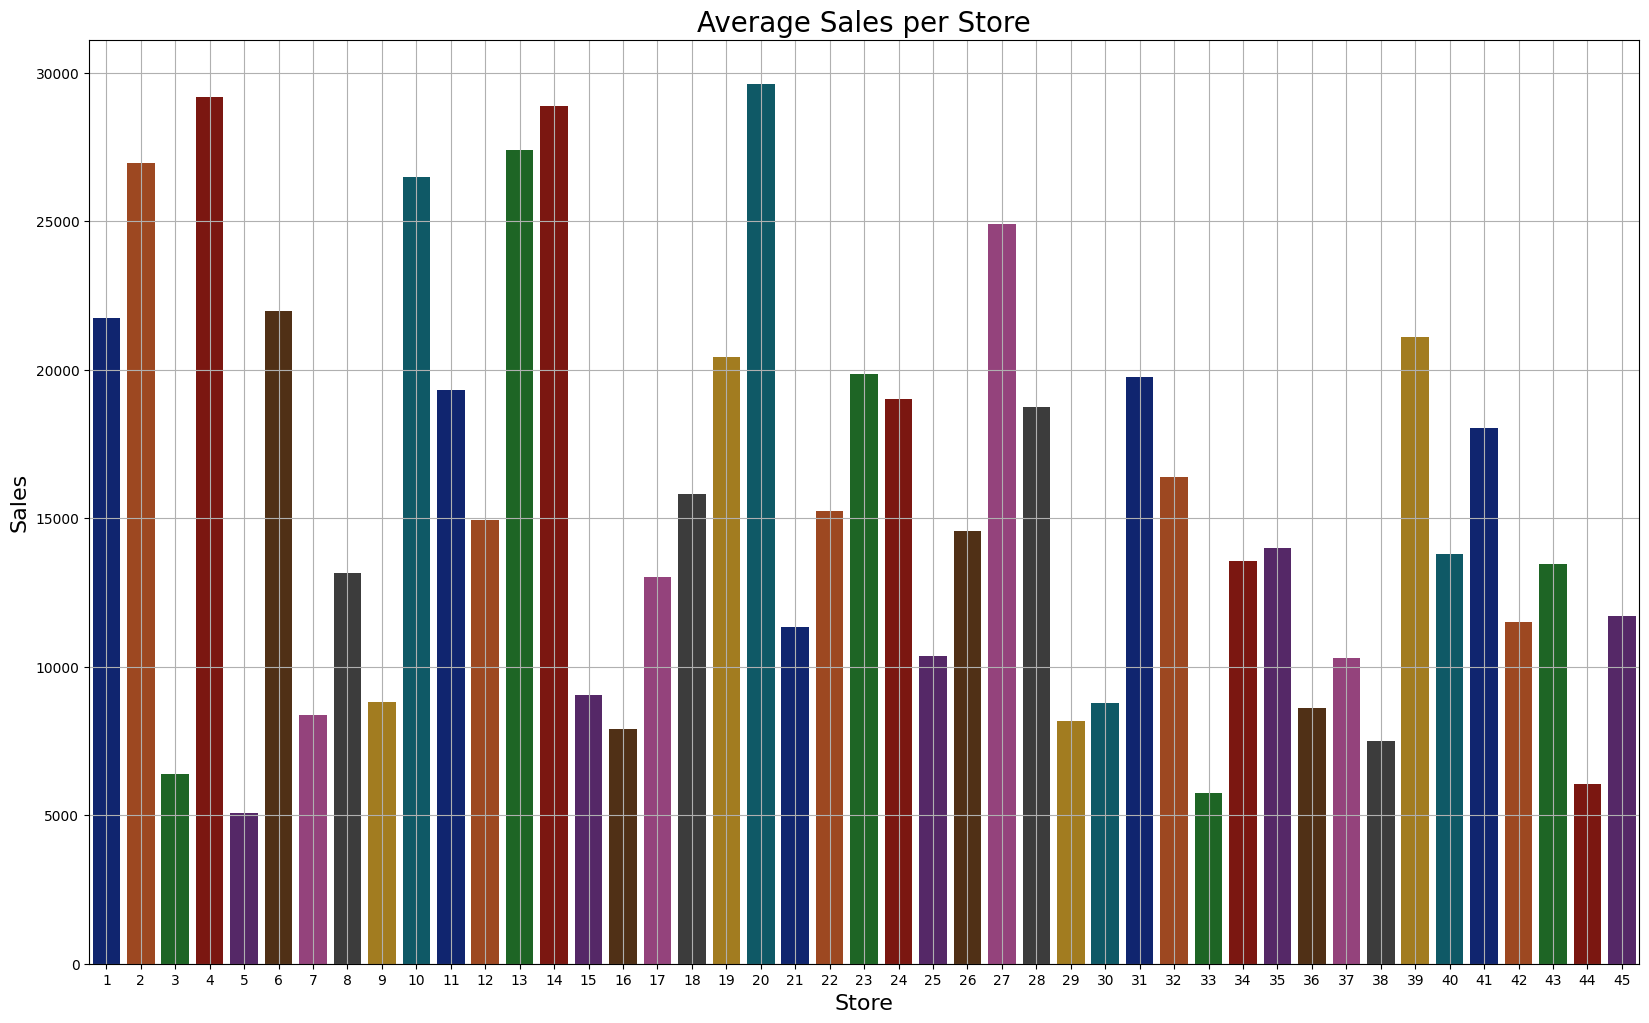

In [ ]:
# Average Sales per Store

weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot(weekly_sales, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

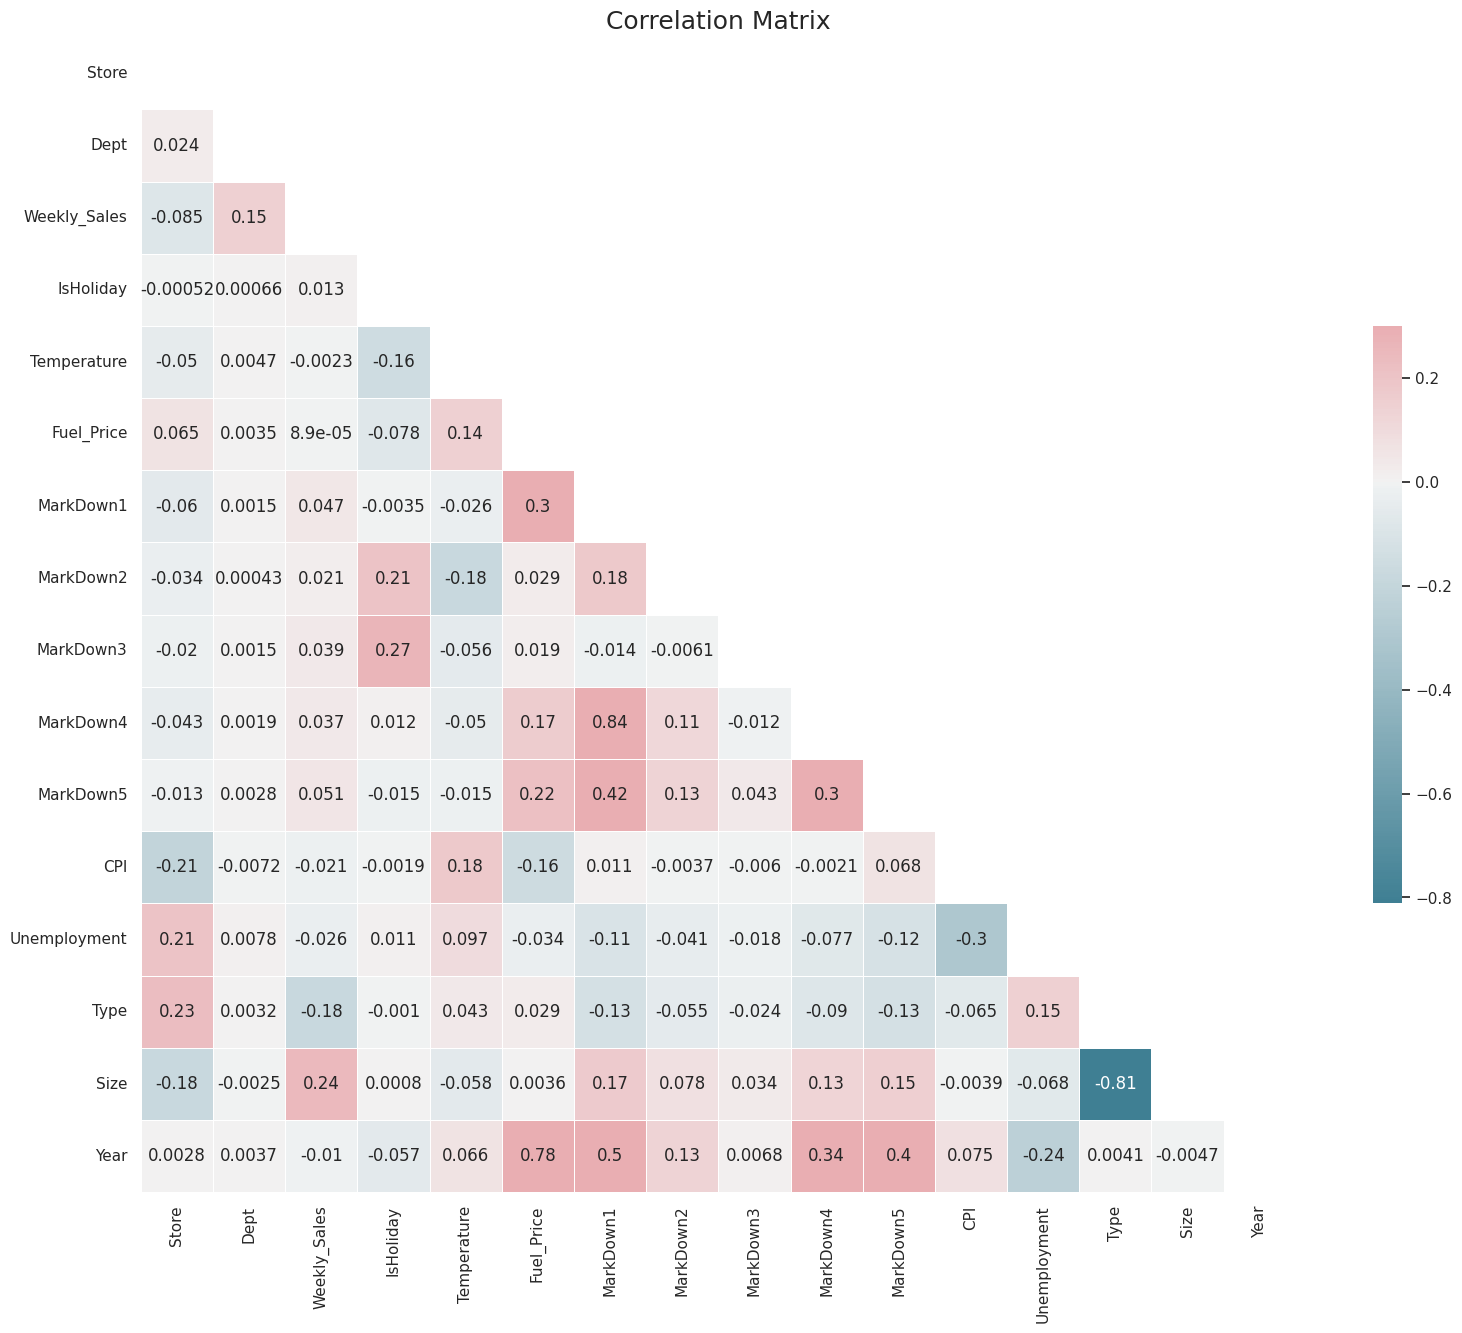

In [ ]:
sns.set(style = "white")

numeric_cols = train_merge.select_dtypes(include=np.number).columns
used_cols = [c for c in numeric_cols if c not in ['Super_Bowl','Labor_Day','Thanksgiving','Christmas','isHoliday']]
corr = train_merge[used_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [ ]:
# Dropping down the variables that have weak correlation

train_merge = train_merge.drop(columns=['Temperature','Fuel_Price','MarkDown4', 'MarkDown5'])
test_merge = test_merge.drop(columns=['Temperature','Fuel_Price', 'MarkDown4', 'MarkDown5'])

In [ ]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int64         
 5   MarkDown1     420212 non-null  float64       
 6   MarkDown2     420212 non-null  float64       
 7   MarkDown3     420212 non-null  float64       
 8   CPI           420212 non-null  float64       
 9   Unemployment  420212 non-null  float64       
 10  Type          420212 non-null  int64         
 11  Size          420212 non-null  int64         
 12  Week          420212 non-null  datetime64[ns]
 13  Year          420212 non-null  int32         
 14  Month         420212 non-null  period[M]     
 15  Super_Bowl    420212 n

In [ ]:
test_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday_x   115064 non-null  bool          
 4   MarkDown1     114915 non-null  float64       
 5   MarkDown2     86437 non-null   float64       
 6   MarkDown3     105235 non-null  float64       
 7   CPI           76902 non-null   float64       
 8   Unemployment  76902 non-null   float64       
 9   IsHoliday_y   115064 non-null  bool          
 10  Type          115064 non-null  object        
 11  Size          115064 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 9.0+ MB


In [ ]:
# Getting the columns in the train_merge
train_merge.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'CPI', 'Unemployment', 'Type', 'Size', 'Week',
       'Year', 'Month', 'Super_Bowl', 'Labor_Day', 'Thanksgiving',
       'Christmas'],
      dtype='object')

In [ ]:
# Getting the columns in test_merge
test_merge.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday_x', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

### Dividing the data into Train and Test

In [ ]:
target = "Weekly_Sales"
# Check for non-numeric values in X_train
numeric_cols = train_merge.select_dtypes(include=np.number).columns.tolist()

used_cols = [c for c in numeric_cols if c not in [target,'Date']]
X = train_merge[used_cols] # Selecting the values to be taken in the X
y = train_merge[target]

# Model Building

In [ ]:
# Splitting the data into Train and Test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294148 entries, 162131 to 122261
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         294148 non-null  int64  
 1   Dept          294148 non-null  int64  
 2   IsHoliday     294148 non-null  int64  
 3   MarkDown1     294148 non-null  float64
 4   MarkDown2     294148 non-null  float64
 5   MarkDown3     294148 non-null  float64
 6   CPI           294148 non-null  float64
 7   Unemployment  294148 non-null  float64
 8   Type          294148 non-null  int64  
 9   Size          294148 non-null  int64  
 10  Year          294148 non-null  int32  
 11  Super_Bowl    294148 non-null  int64  
 12  Labor_Day     294148 non-null  int64  
 13  Thanksgiving  294148 non-null  int64  
 14  Christmas     294148 non-null  int64  
dtypes: float64(5), int32(1), int64(9)
memory usage: 34.8 MB


Ridge Regression

In [ ]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 7, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(X_train)
y_val_pred = ridge_regressor.predict(X_val)

In [ ]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  21727.19836182697
R-Squared:  0.08573889633920218


In [ ]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val.values, y_val_pred)))
print("R-Squared: ", r2_score(y_val.values, y_val_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  21720.475433299038
R-Squared:  0.08799043592345768


Decision Tree

In [ ]:
# Performing GridSearchCV on Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler

depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
scaler=RobustScaler()

pipe = make_pipeline(scaler,tree)
pipe.fit(X_train,y_train)


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15, 16,
                                                        17, 18, 19, 20, 21, 22,
                                                        23, 24, 25, 26, 27, 28,
                                                        29]}))])

In [ ]:
# Predicting train and test results
y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

In [ ]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute Error: ", mae(y_train.values, y_train_pred))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  2230.250166102634
Mean absolute Error:  698.1586137445533
R-Squared:  0.9903668140046091


In [ ]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("Mean absolute Error: ", mae(y_val, y_val_pred))
print("R-Squared: ", r2_score(y_val, y_val_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  6110.632664777305
Mean absolute Error:  2284.4477662037184
R-Squared:  0.9278173049710876


Randome Forest

In [ ]:
# Performing RandomsearchCV on Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_absolute_error')

In [ ]:
# Predicting train and test results
y_train_pred = random_regressor.predict(X_train)
y_val_pred = random_regressor.predict(X_val)

In [ ]:
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute Error: ", mae(y_train.values, y_train_pred))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  3115.5165867270066
Mean absolute Error:  1110.218266030647
R-Squared:  0.9812015119635215


In [ ]:
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("Mean absolute Error: ", mae(y_val, y_val_pred))
print("R-Squared: ", r2_score(y_val, y_val_pred))

Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  4865.861789936137
Mean absolute Error:  1895.9936786682256
R-Squared:  0.9542300670201924


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting
gb = GradientBoostingRegressor()
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': list(range(3, 10)),
    'learning_rate': [0.01, 0.1, 0.2]
}
gb_grid = GridSearchCV(gb, gb_param_grid, cv=10, n_iter=3, n_jobs=-1)
pipe = make_pipeline(RobustScaler(), gb_grid)
pipe.fit(X_train, y_train)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'n_iter'

In [ ]:
# Predicting train and test results
y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

In [ ]:
print("Train Results for Gradient Boosting Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute Error: ", mae(y_train.values, y_train_pred))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Gradient Boosting Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("Mean absolute Error: ", mae(y_val, y_val_pred))
print("R-Squared: ", r2_score(y_val, y_val_pred))

Since the MAE value is high even after scaling, I'm gonna try log transformation.

In [ ]:
X.skew()

In [ ]:
# List of features to log transform
features_to_log_transform = [
    'MarkDown1', 'MarkDown2', 'MarkDown3',
    'Unemployment'
]

# Applying log transformation to positively skewed features
# Adding 1 to avoid log(0) which is undefined
X_log_transformed = X.copy()
for feature in features_to_log_transform:
    X_log_transformed[feature] = np.log1p(X[feature])

# Check skewness after log transformation
print("Skewness after log transformation:")
print(X_log_transformed[features_to_log_transform].skew())

In [ ]:
X_log_transformed['MarkDown3'] = np.log1p(X['MarkDown3'] + 0.001)

In [ ]:
print(X_log_transformed[features_to_log_transform].skew())

In [ ]:
# Splitting the data into Train and Test
X_train, X_val, y_train, y_val = train_test_split(X_log_transformed, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.isnull().sum()

In [ ]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

Random Forest with log transformation

In [ ]:
# Performing RandomsearchCV on Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(X_train, y_train)

In [ ]:
# Predicting train and test results
y_train_pred = random_regressor.predict(X_train)
y_val_pred = random_regressor.predict(X_val)

In [ ]:
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute Error: ", mae(y_train.values, y_train_pred))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("Mean absolute Error: ", mae(y_val, y_val_pred))
print("R-Squared: ", r2_score(y_val, y_val_pred))

In [ ]:
test_merge['Weekly_Sales'] = pipe.predict(test_merge)

In [ ]:
test_merge.to_csv('test_output.csv', index=False)